# Testing my ICA algorithms

In [1]:
import numpy as np
from scipy.signal import square, sawtooth
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd

%matplotlib inline

from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

In [2]:
x = np.linspace(-10, 10, 1000)
source1 = np.sin(x)
source2 = square(x)
source3 = sawtooth(x)

sources = np.array([source1, source2, source3])

A = np.random.random(size =  (3,3))
mixtures = np.dot(A, sources)
print(A)

[[ 0.23613253  0.69605712  0.77576145]
 [ 0.70956514  0.096128    0.74227935]
 [ 0.00950453  0.46188724  0.35368327]]


## NPCA-RLS

In [3]:
estimates, W = NPCA_RLS(mixtures, runs = 20)

Lost convergence at iterator 694
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0
Lost convergence at iterator 0


E:\OneDrive\Documentos\UFRJ\Mestrado\PEE\ICA\funcoes\ICAfunctions.py:29: RuntimeWarning: invalid value encountered in true_divide
  m = h/(beta + np.dot(z.T, h))
E:\OneDrive\Documentos\UFRJ\Mestrado\PEE\ICA\funcoes\ICAfunctions.py:10: RuntimeWarning: invalid value encountered in sign
  return np.multiply(np.power(y,2),np.sign(y))


In [4]:
estimates.shape

(3, 1000)

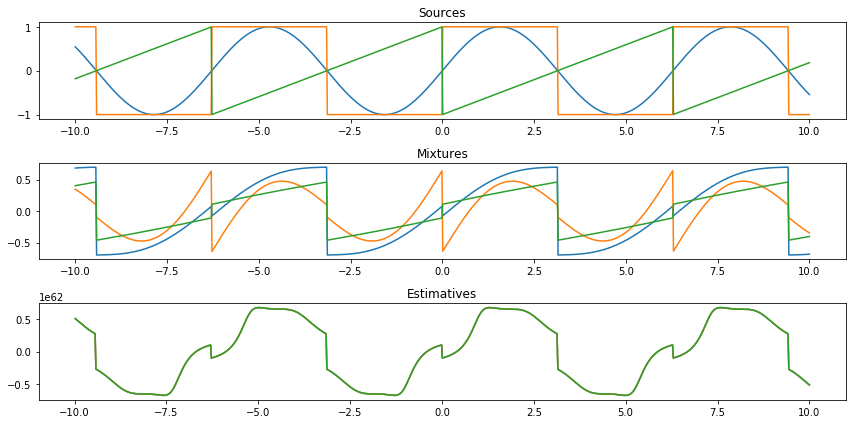

In [5]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

axes[0].plot(x, sources.T)
axes[0].set_title('Sources')
axes[1].plot(x, mixtures.T)
axes[1].set_title('Mixtures')
axes[2].plot(x, estimates.T)
axes[2].set_title('Estimatives')

fig.tight_layout()

ValueError: range parameter must be finite.

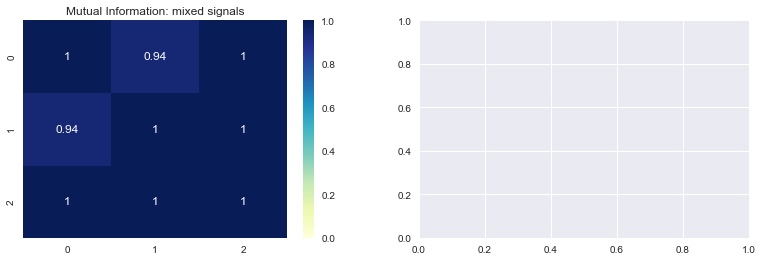

In [6]:
plot_MutualInformation(mixtures, estimates)

## Cichocki-Unbehauen Feedback

In [ ]:
estimates, W = cichocki_Feedback(mixtures, runs= 2)

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

axes[0].plot(x, sources.T)
axes[0].set_title('Sources')
axes[1].plot(x, mixtures.T)
axes[1].set_title('Mixtures')
axes[2].plot(x, estimates.T)
axes[2].set_title('Estimatives')

fig.tight_layout()
fig.show()

In [ ]:
plot_MutualInformation(mixtures, estimates)

## Cichocki-Unbehauen Feedforward

In [ ]:
estimates, W = cichocki_Feedforward(mixtures, runs= 2, learningRate = 1e-6)

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

axes[0].plot(x, sources.T)
axes[0].set_title('Sources')
axes[1].plot(x, mixtures.T)
axes[1].set_title('Mixtures')
axes[2].plot(x, estimates.T)
axes[2].set_title('Estimatives')

fig.tight_layout()
fig.show()

In [ ]:
plot_MutualInformation(mixtures, estimates)